In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import libpysal as ps

In [2]:
file_name = "Data/BayouMeto_Lidar_QA.csv"

# Read file into pandas DataFrame
lidar_info = pd.read_csv(file_name)

In [4]:
lidar_info.head()

,Region,ID,Description,X,Y,GPS-Z,Lidar-Z,LandCover
0,North,21,Lonoke Park,600612.683,3849204.812,73.620,73.684,Asphalt
1,North,22,Lonoke HS Parking,600123.308,3849067.230,73.852,73.973,Asphalt
2,North,26,England HS Parking,595917.787,3822919.619,68.964,69.088,Asphalt
3,North,39,Carlisle Park,614680.847,3850053.041,70.818,70.955,Asphalt
4,South,8,5800-50063355,613953.929,3805055.048,58.563,58.518,Asphalt


<AxesSubplot:xlabel='X', ylabel='Y'>

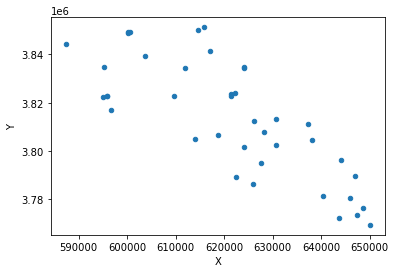

In [43]:
df = pd.DataFrame(lidar_info)
df.plot.scatter(x='X', y='Y')


In [32]:
lid_stdev = lidar_info['Lidar-Z'].std()
gps_stdev = lidar_info['GPS-Z'].std()
lid_mean = lidar_info['Lidar-Z'].mean()
gps_mean = lidar_info['GPS-Z'].mean()

print("stdev lidar-Z = ", lidar_info['Lidar-Z'].std())
print("stdev GPS-Z = ", lidar_info['GPS-Z'].std())
print("mean lidar-Z = ", lidar_info['Lidar-Z'].mean())
print("mean GPS-Z = ", lidar_info['GPS-Z'].mean())
print("STDEV difference is: ", lid_stdev - gps_stdev)
print("Mean difference is: ", lid_mean - gps_mean)

stdev lidar-Z =  6.760021637615196
stdev GPS-Z =  6.728254102605726
mean lidar-Z =  61.82535
mean GPS-Z =  61.755250000000004
STDEV difference is:  0.03176753500946994
Mean difference is:  0.0700999999999965


           ID            X             Y    GPS-Z  Lidar-Z
Region                                                    
North   30.65  607650.4276  3.834474e+06  66.8123  66.9520
South   10.50  634561.2723  3.793753e+06  56.6982  56.6987
              ID             X             Y     GPS-Z   Lidar-Z
Region                                                          
North   6.149668  11840.210418  11587.246524  5.527304  5.475289
South   5.916080  11020.376044  14471.719863  2.920759  2.913843
               ID              X             Y      GPS-Z    Lidar-Z
Region                                                              
North   24.500332  595810.217182  3.822886e+06  61.284996  61.476711
South    4.583920  623540.896256  3.779281e+06  53.777441  53.784857


<AxesSubplot:xlabel='X'>

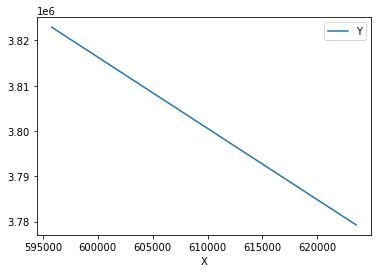

In [38]:
t1 = lidar_info.groupby(["Region"]).mean()
t2 = lidar_info.groupby(["Region"]).std()
diffy = t1-t2
print(t1)
print(t2)
print(diffy)




In [20]:
print(lidar_info.groupby(["LandCover"]).mean())
print(lidar_info.groupby(["LandCover"]).std())

                  ID              X             Y      GPS-Z    Lidar-Z
LandCover                                                              
Asphalt    18.714286  612264.622000  3.824281e+06  65.982857  66.031571
Dirt       19.285714  620431.068000  3.811428e+06  60.631286  60.650429
Forest     18.428571  636038.514286  3.794406e+06  55.674429  55.780571
Grass      24.500000  609484.451900  3.823460e+06  65.426800  65.505700
Scrub      20.333333  629805.561000  3.813236e+06  59.991333  60.079889
                  ID             X             Y     GPS-Z   Lidar-Z
LandCover                                                           
Asphalt    11.912379  14883.019609  25472.159668  7.623196  7.705817
Dirt       13.161994  19322.403162  25214.350098  5.303142  5.319911
Forest     10.845232  13668.268701  26984.602264  2.734621  2.840509
Grass      11.664285  15898.210478  21949.282855  7.294789  7.326083
Scrub      13.228757  11753.902787  17053.087042  4.592138  4.643853


In [ ]:
#Measurement quality is affected by landcover. Regions have landcover that affect how measurements are made.

                         ID              X             Y      GPS-Z    Lidar-Z
LandCover Region                                                              
Asphalt   North   18.713465  594659.226892  3.829543e+06  69.466190  69.595633
          South    6.139141  612623.965470  3.790629e+06  55.483833  55.360318
Dirt      North   25.137012  596490.135553  3.822060e+06  60.260749  60.301995
          South    0.432236  625300.702565  3.773069e+06  55.113008  55.053772
Forest    North   31.792893  621725.703220  3.821649e+06  58.141529  58.602979


<AxesSubplot:xlabel='X', ylabel='Y'>

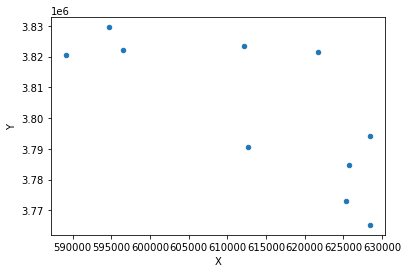

In [44]:
both = lidar_info.groupby(["LandCover", "Region"]).mean()
bothstd = lidar_info.groupby(["LandCover", "Region"]).std()

diff = both - bothstd
print(diff.head())
df = pd.DataFrame(diff)

df.plot.scatter(x='X', y='Y')
#df.plot(x='x', y='Y')

